# 1. SETUP

In [1]:
import sys
print("Python version:", sys.version_info)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: sys.version_info(major=3, minor=8, micro=13, releaselevel='final', serial=0)
scikit-learn version: 1.0.2


In [2]:
import numpy as np
import os

### 1.1 Figures setup

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

### 1.2 Figures dir

In [4]:
PROJECT_ROOT_DIR = "."
PROJECT_NAME = "yacht_hydrodnamics"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [5]:
def save_fig(fig_id, tigh_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tigh_layout:
        plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
# 2. GET THE DATA

In [7]:
### 2.1 Download the data

In [8]:
import urllib.request

In [9]:
DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/00243/"
YACHT_URL = DOWNLOAD_ROOT + "yacht_hydrodynamics.data"
YACHT_PATH = os.path.join("datasets", "yacht")

In [10]:
def fetch_yacht_data(yacht_url=YACHT_URL, yacht_path=YACHT_PATH):
    if not os.path.isdir(yacht_path):
        os.makedirs(yacht_path)
    data_path = os.path.join(yacht_path, "yacht_hydrodynamics.data")
    urllib.request.urlretrieve(yacht_url, data_path)

fetch_yacht_data()

In [11]:
import pandas as pd

def load_yacht_data(yacht_path=YACHT_PATH):
    data_path = os.path.join(yacht_path, "yacht_hydrodynamics.data")
    return pd.read_table(data_path, sep='\s+', names=["L_bc", "Cp", "L_D_ratio", "B_T_ratio", "L_B_ratio", "Fn", "R_rs"])

In [12]:
yacht = load_yacht_data()
yacht.head()

,L_bc,Cp,L_D_ratio,B_T_ratio,L_B_ratio,Fn,R_rs
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [13]:
yacht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L_bc       308 non-null    float64
 1   Cp         308 non-null    float64
 2   L_D_ratio  308 non-null    float64
 3   B_T_ratio  308 non-null    float64
 4   L_B_ratio  308 non-null    float64
 5   Fn         308 non-null    float64
 6   R_rs       308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB


In [14]:
sample_incomplete_rows = yacht[yacht.isnull().any(axis=1)].head()
sample_incomplete_rows

,L_bc,Cp,L_D_ratio,B_T_ratio,L_B_ratio,Fn,R_rs


In [15]:
yacht["L_bc"].value_counts()

-2.3    140
 0.0     56
-5.0     56
-2.4     42
-2.2     14
Name: L_bc, dtype: int64

In [16]:
yacht["Cp"].value_counts()

0.565    70
0.530    70
0.600    56
0.568    28
0.569    14
0.564    14
0.574    14
0.562    14
0.585    14
0.546    14
Name: Cp, dtype: int64

In [17]:
yacht["L_D_ratio"].value_counts()

4.78    126
5.10     56
4.34     42
4.77     28
4.36     14
5.14     14
5.11     14
4.76     14
Name: L_D_ratio, dtype: int64

In [18]:
yacht["B_T_ratio"].value_counts()

3.99    42
3.94    28
3.75    28
4.24    28
4.17    14
2.81    14
3.68    14
3.69    14
4.13    14
3.04    14
3.84    14
4.95    14
2.98    14
3.96    14
3.95    14
5.35    14
4.23    14
Name: B_T_ratio, dtype: int64

In [19]:
yacht["L_B_ratio"].value_counts()

3.15    112
3.51     56
3.17     28
2.76     28
3.64     14
3.53     14
3.32     14
3.07     14
3.16     14
2.73     14
Name: L_B_ratio, dtype: int64

In [20]:
yacht["Fn"].value_counts()

0.125    22
0.150    22
0.175    22
0.200    22
0.225    22
0.250    22
0.275    22
0.300    22
0.325    22
0.350    22
0.375    22
0.400    22
0.425    22
0.450    22
Name: Fn, dtype: int64

In [21]:
yacht.describe()

,L_bc,Cp,L_D_ratio,B_T_ratio,L_B_ratio,Fn,R_rs
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


Saving figure attribute_histogram_plots


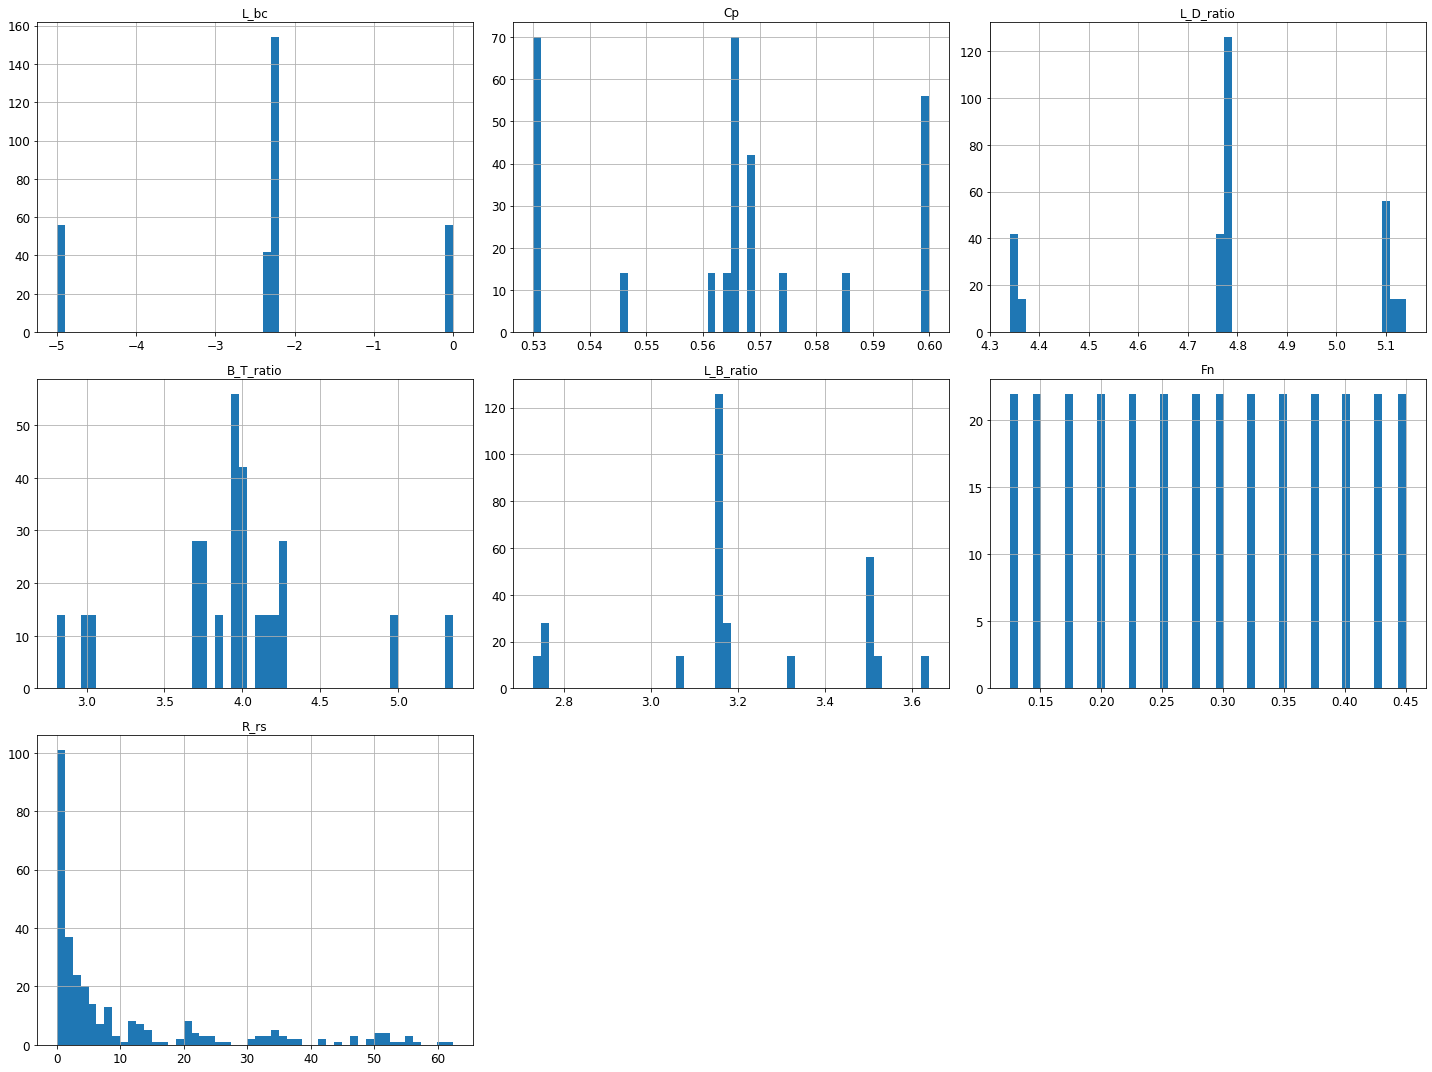

In [22]:
yacht.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")